In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from sklearn.metrics import r2_score

In [24]:
def clean_file(file_name, pattern):
    counter = 0
    myFile = open(file_name, "r")
    strData = myFile.read()
    listData = strData.split("\n")
    myFile.close()
    cleaned = []
    for line in listData:
        if ",," in line:
            line = line.replace(",,", ",")
        if pattern in line:
            counter+=1
        if pattern in line and counter>=1:
            continue
        cleaned.append(line+"\n")
    print(cleaned)
    f = open(file_name, "w")
    for line in cleaned:
        f.write(line)
    f.close()
        

#clean_file("NBA2006Adv.csv", "Player")
clean_file("Nash_06.csv", "Average")

['DATE,TM,OPP,SCORE,MIN,PTS,REB,AST,STL,BLK,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TS%,OREB,DREB,TOV,PF,+/-\n', 'Sat 6/3,PHX,DAL,L 93-102,42,19,6,9,1,0,7,13,53.8,1,2,50.0,4,4,100.0,64.4,0,6,3,2,-7\n', 'Thu 6/1,PHX,DAL,L 101-117,39,20,6,11,1,1,5,17,29.4,1,6,16.7,9,9,100.0,47.7,0,6,3,3,-9\n', 'Tue 5/30,PHX,DAL,W 106-86,33,21,0,7,0,1,8,13,61.5,1,1,100.0,4,4,100.0,71.1,0,0,2,1,+14\n', 'Sun 5/28,PHX,DAL,L 88-95,37,21,1,7,0,1,9,18,50.0,3,7,42.9,0,0,58.3,0,1,4,1,0,-5\n', 'Fri 5/26,PHX,DAL,L 98-105,39,16,2,11,0,0,6,10,60.0,2,2,100.0,2,3,66.7,70.7,0,2,4,4,+1\n', 'Wed 5/24,PHX,DAL,W 121-118,40,27,5,16,0,0,11,18,61.1,2,5,40.0,3,3,100.0,69.9,1,4,3,2,+6\n', 'Mon 5/22,PHX,LAC,W 127-107,38,29,2,11,1,0,11,16,68.8,4,5,80.0,3,4,75.0,81.6,0,2,4,2,+12\n', 'Thu 5/18,PHX,LAC,L 106-118,39,17,2,11,1,0,6,16,37.5,2,5,40.0,3,3,100.0,49.1,1,1,1,2,-22\n', 'Tue 5/16,PHX,LAC,W 125-118,50,17,7,13,0,2,7,17,41.2,0,5,0.0,3,3,100.0,46.4,0,7,5,4,+15\n', 'Sun 5/14,PHX,LAC,L 107-114,39,8,3,11,0,0,3,11,27.3,0,2,0.0,2,3,66.7,32.

In [5]:
nba06a =  pd.read_csv("NBA2006Adv.csv")
nba06a = nba06.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1)
nba06a

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Shareef Abdur-Rahim,PF,29,SAC,72,1961,17.2,0.588,0.035,...,12.5,20.1,4.0,2.2,6.2,0.152,0.5,0.4,0.9,1.4
1,2,Alex Acker,SG,23,DET,5,35,-2.4,0.281,0.313,...,20.0,27.2,-0.2,0.0,-0.2,-0.230,-11.0,-4.2,-15.3,-0.1
2,3,Malik Allen,PF,27,CHI,54,701,11.5,0.504,0.004,...,11.4,19.2,0.0,1.0,1.0,0.068,-3.0,0.3,-2.7,-0.1
3,4,Ray Allen*,SG,30,SEA,78,3022,22.2,0.590,0.435,...,10.2,27.4,9.8,-0.3,9.5,0.150,6.4,-2.0,4.4,4.9
4,5,Tony Allen,PG,24,BOS,51,978,12.9,0.554,0.124,...,16.8,18.8,0.6,1.0,1.7,0.082,-2.3,0.9,-1.4,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,454,Antoine Wright,SG,21,NJN,39,370,0.7,0.386,0.185,...,18.8,14.2,-0.8,0.3,-0.5,-0.062,-7.9,-0.9,-8.8,-0.6
559,455,Bracey Wright,SG,21,MIN,7,135,12.1,0.534,0.333,...,12.1,23.2,0.1,0.1,0.2,0.054,-0.5,-2.2,-2.7,0.0
560,456,Dorell Wright,SF,20,MIA,20,132,13.2,0.574,0.140,...,21.7,22.6,0.0,0.2,0.2,0.064,-2.6,0.0,-2.6,0.0
561,457,Lorenzen Wright,C,30,MEM,78,1689,12.2,0.496,0.005,...,12.8,15.1,0.8,3.0,3.7,0.106,-2.7,0.7,-2.1,0.0


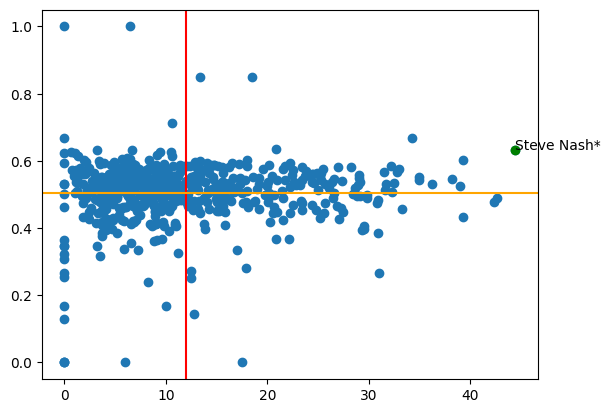

In [18]:
x = nba06a["AST%"]
y = nba06a["TS%"]
plt.scatter(x, y)
labels = nba06a["Player"].values
for i, label in enumerate(labels):
    if "Steve Nash" in label:
        plt.plot(x[i], y[i], 'o', c='g')
        plt.annotate(label, (x[i], y[i]))

plt.axvline(np.mean(x),c='r')
plt.axhline(np.mean(y),c='orange')